# 1. train, validation, test data directory 생성

소량의 데이터로부터 일부 데이터를 학습, 검증, 테스트 데이터로 분리  
DataGenerator 사용 실습

In [2]:
import os, shutil

# 원본 이미지 경로
original_dataset_dir = "./datasets/dogs-vs-cats/train"
# original_dataset_dir = os.path.abspath(original_dataset_dir)

# 소량의 학습, 검증, 테스트 데이터 분리를 위한 디렉터리
base_dir = "./datasets/dogs-vs-cats-small/"
# base_dir = os.path.abspath(base_dir)
os.mkdir(base_dir)

# 학습, 검증, 테스트 데이터 디렉터리 경로
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

# 각 폴더 생성
train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

# 파일명을 기준으로 학습 1000장, 검증 500장, 테스트 500장 복사
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [3]:
# ConvNet 모델 정의
# 이진 분류 문제 (cat or dog)

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
# optimizer 정의
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [5]:
# 데이터 전처리 및 배치 텐서 변환을 위한 ImageDataGenerator 정의
# (20, 150, 150, 3) 이미지 배치, (20, ) 이진 레이블 배치

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
)


Epoch 1/30


C:\Users\wjsrj\AppData\Local\Temp\ipykernel_60556\1938628719.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 15s 112ms/step - loss: 0.6885 - acc: 0.5275 - val_loss: 0.6692 - val_acc: 0.6280
Epoch 2/30
100/100 [==============================] - 3s 30ms/step - loss: 0.6453 - acc: 0.6345 - val_loss: 0.6205 - val_acc: 0.6660
Epoch 3/30
100/100 [==============================] - 3s 30ms/step - loss: 0.5792 - acc: 0.6980 - val_loss: 0.6074 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 3s 31ms/step - loss: 0.5471 - acc: 0.7190 - val_loss: 0.6356 - val_acc: 0.6350
Epoch 5/30
100/100 [==============================] - 3s 31ms/step - loss: 0.5237 - acc: 0.7430 - val_loss: 0.5949 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4967 - acc: 0.7545 - val_loss: 0.6050 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 3s 30ms/step - loss: 0.4718 - acc: 0.7785 - val_loss: 0.5564 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 3s 30ms/step - loss: 0.4

In [7]:
model.save('cats_and_dogs_small_1.h5')

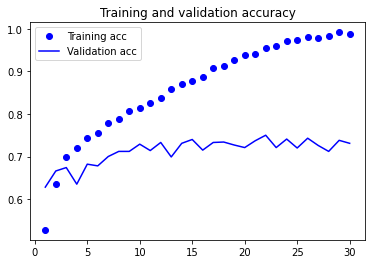

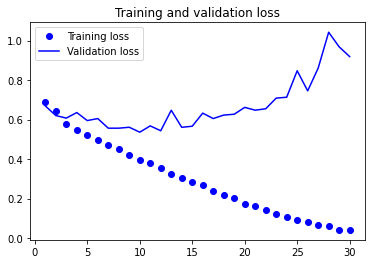

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 2. 데이터 증식

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)


(150, 150, 3)


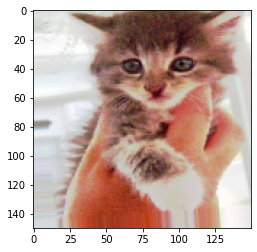

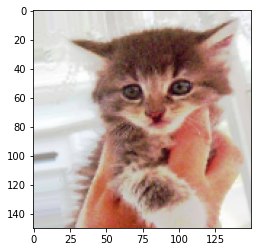

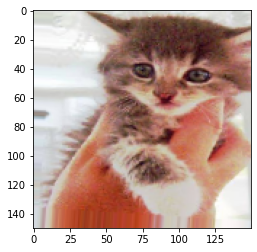

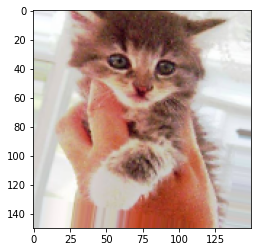

In [10]:
# 변형되어 증식되는 이미지 확인

from tensorflow.keras.preprocessing import image

fnames = sorted(
    [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
)

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [11]:
# 기존 모델에 Dropout 추가

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"]
)

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

# 갖고 있는 데이터에 비해 너무 많은 step을 지정하여 에러 발생
# steps_per_epoch * epochs가 전체 데이터 사이즈보다 큼
# train_datagen에서 데이터 증식 설정을 해준 것으로 이해했는데 왜 ?
# 버전을 낮추면 해결된다고 하지만 음..
history = model.fit(
    train_generator,
    # steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    # validation_steps=50,
)

model.save("cats_and_dogs_small_2.h5")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 10s 161ms/step - loss: 0.6731 - acc: 0.5765 - val_loss: 0.6587 - val_acc: 0.5950
Epoch 2/100
63/63 [==============================] - 10s 159ms/step - loss: 0.6636 - acc: 0.5970 - val_loss: 0.6501 - val_acc: 0.6130
Epoch 3/100
63/63 [==============================] - 10s 155ms/step - loss: 0.6559 - acc: 0.6055 - val_loss: 0.6294 - val_acc: 0.6300
Epoch 4/100
63/63 [==============================] - 10s 158ms/step - loss: 0.6425 - acc: 0.6275 - val_loss: 0.6186 - val_acc: 0.6420
Epoch 5/100
63/63 [==============================] - 10s 153ms/step - loss: 0.6308 - acc: 0.6620 - val_loss: 0.5960 - val_acc: 0.6790
Epoch 6/100
63/63 [==============================] - 10s 163ms/step - loss: 0.6151 - acc: 0.6650 - val_loss: 0.5857 - val_acc: 0.6820
Epoch 7/100
63/63 [==============================] - 10s 158ms/step - loss: 0.6091 - acc: 0.6655 - val_loss: 0.5

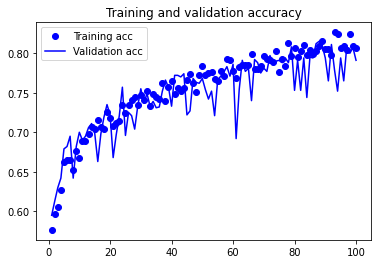

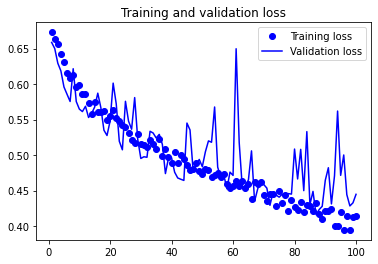

In [16]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


# 3. pretrained model 사용
## (1) feature extraction

In [21]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [22]:
# 마지막 층 정보
#  block5_pool (MaxPooling2D)  (None, 4, 4, 512)         0   
# 최종적으로 binary_classification 출력을 얻기 위해 해당 VGG16 pretrained model의 출력과 새로운 모델을 연결

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 사전 학습 모델의 가중치가 업데이트되지 않도록 설정을 위한 테스트
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결gks gn 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base를 동결gks gn 훈련되는 가중치의 수: 4


In [24]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

model.compile(
    loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"]
)

history = model.fit(
    train_generator,
    # steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    # validation_steps=50,
)

model.save("cats_and_dogs_small_3.h5")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


63/63 [==============================] - 12s 180ms/step - loss: 0.5627 - acc: 0.7180 - val_loss: 0.4080 - val_acc: 0.8010
Epoch 2/30
63/63 [==============================] - 10s 161ms/step - loss: 0.4342 - acc: 0.7915 - val_loss: 0.3052 - val_acc: 0.8740
Epoch 3/30
63/63 [==============================] - 10s 165ms/step - loss: 0.4118 - acc: 0.8115 - val_loss: 0.2889 - val_acc: 0.8750
Epoch 4/30
63/63 [==============================] - 11s 172ms/step - loss: 0.3824 - acc: 0.8350 - val_loss: 0.2770 - val_acc: 0.8800
Epoch 5/30
63/63 [==============================] - 10s 161ms/step - loss: 0.3636 - acc: 0.8385 - val_loss: 0.2598 - val_acc: 0.8940
Epoch 6/30
63/63 [==============================] - 10s 157ms/step - loss: 0.3560 - acc: 0.8420 - val_loss: 0.2619 - val_acc: 0.8990
Epoch 7/30
63/63 [==============================] - 10s 156ms/step - loss: 0.3281 - acc: 0.8545 - val_loss: 0.2516 - val_acc: 0.8990
Epoch 8/30
63/63 [==============================] - 10s 156ms/step - loss: 0.359

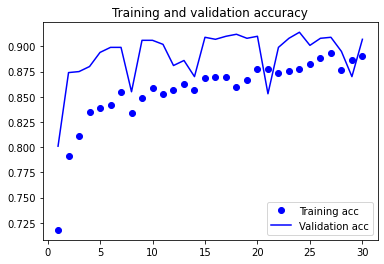

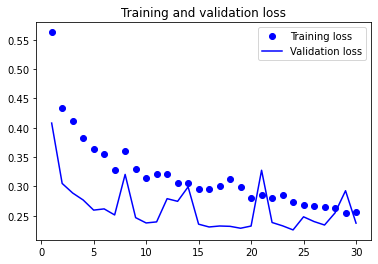

In [25]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


## (2) fine-tuning

In [27]:
# 동결시켰던 사전 학습 모델 일부 층을 학습 가능하게 수정
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(
    loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"]
)

history = model.fit(
    train_generator,
    # steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    # validation_steps=50,
)

Epoch 1/100
63/63 [==============================] - 11s 157ms/step - loss: 0.4352 - acc: 0.8380 - val_loss: 0.1990 - val_acc: 0.9120
Epoch 2/100
63/63 [==============================] - 10s 162ms/step - loss: 0.3105 - acc: 0.8670 - val_loss: 0.2106 - val_acc: 0.9120
Epoch 3/100
63/63 [==============================] - 10s 166ms/step - loss: 0.2863 - acc: 0.8835 - val_loss: 0.1699 - val_acc: 0.9310
Epoch 4/100
63/63 [==============================] - 10s 162ms/step - loss: 0.2536 - acc: 0.8880 - val_loss: 0.4784 - val_acc: 0.8160
Epoch 5/100
63/63 [==============================] - 10s 164ms/step - loss: 0.2612 - acc: 0.9070 - val_loss: 0.1660 - val_acc: 0.9360
Epoch 6/100
63/63 [==============================] - 10s 165ms/step - loss: 0.2348 - acc: 0.9135 - val_loss: 0.4049 - val_acc: 0.9040
Epoch 7/100
63/63 [==============================] - 10s 162ms/step - loss: 0.2266 - acc: 0.9115 - val_loss: 0.2075 - val_acc: 0.9260
Epoch 8/100
63/63 [==============================] - 11s 171ms

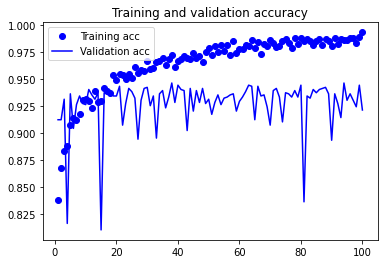

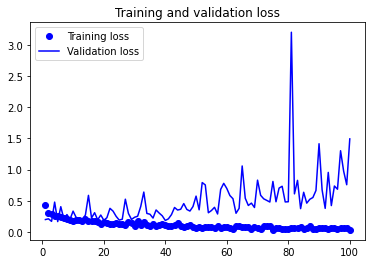

In [28]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [30]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print("test acc:", test_acc)
print("test loss:", test_loss)

Found 1000 images belonging to 2 classes.


C:\Users\wjsrj\AppData\Local\Temp\ipykernel_60556\151610473.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9150000214576721
test loss: 2.5837483406066895
